In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
convert = pd.read_csv('/Users/judithha/Desktop/GAWB_Wave.csv')

In [3]:
#SAMPLE DOWN NON-RESPONDERS TO GET A BALANCE TARGET VARIABLE & REMOVE IRRELEVANT FEATURES
Conversion = convert.loc[convert['Wave_Activation'] == 1]
Non_conv = convert.loc[convert['Wave_Activation'] == 0]
NC_sampled= Non_conv.sample(n=4300, random_state=12)
convert2 = pd.concat([Conversion,NC_sampled], ignore_index=True)

del convert2['Record'] #remove this column as it's just a record ID, not a feature


In [4]:
y=convert2.Wave_Activation

In [5]:
convert2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Data columns (total 13 columns):
OEM                  8597 non-null int64
CC                   8597 non-null int64
ListenerPrefs        8597 non-null int64
StreamingHrs         8597 non-null float64
EverStreamed         8597 non-null int64
PrevDD               8597 non-null int64
IncomeOver75k        8597 non-null int64
DeactFinancial       8597 non-null int64
DeactNotListening    8597 non-null int64
DeactValue           8597 non-null int64
DiscountAtDeact      8597 non-null int64
Tenure               8597 non-null int64
Wave_Activation      8597 non-null int64
dtypes: float64(1), int64(12)
memory usage: 873.2 KB


In [6]:
# calculate the baseline accuracy:
y.value_counts()/y.count()

0    0.500174
1    0.499826
Name: Wave_Activation, dtype: float64

In [7]:
feature_cols = ["OEM","CC", "EverStreamed", "PrevDD", "IncomeOver75k",  "Tenure"]
#feature_cols = ["OEM", "CC", "EverStreamed", "PrevDD", "IncomeOver75k", "DeactNotListening", "DiscountAtDeact", "Tenure"]
X = convert2[feature_cols]

In [8]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

# check y's shape (single dimension with length n)
print(y.shape)

(8597, 6)
(8597,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object with 5 neighbor
knn = KNeighborsClassifier(n_neighbors=5)

# fit on the unstandardized data:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
# predict the response values for the observations in X ("test the model")
# store the predicted response values
y_pred_class = knn.predict(X)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

0.7072234500407119


In [11]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.5)

# STEP 2: train the model on the training set (using K=5)
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.5861828332170272


In [12]:
knn = KNeighborsClassifier(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.49941846941149104


In [14]:
# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, 50):
#for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

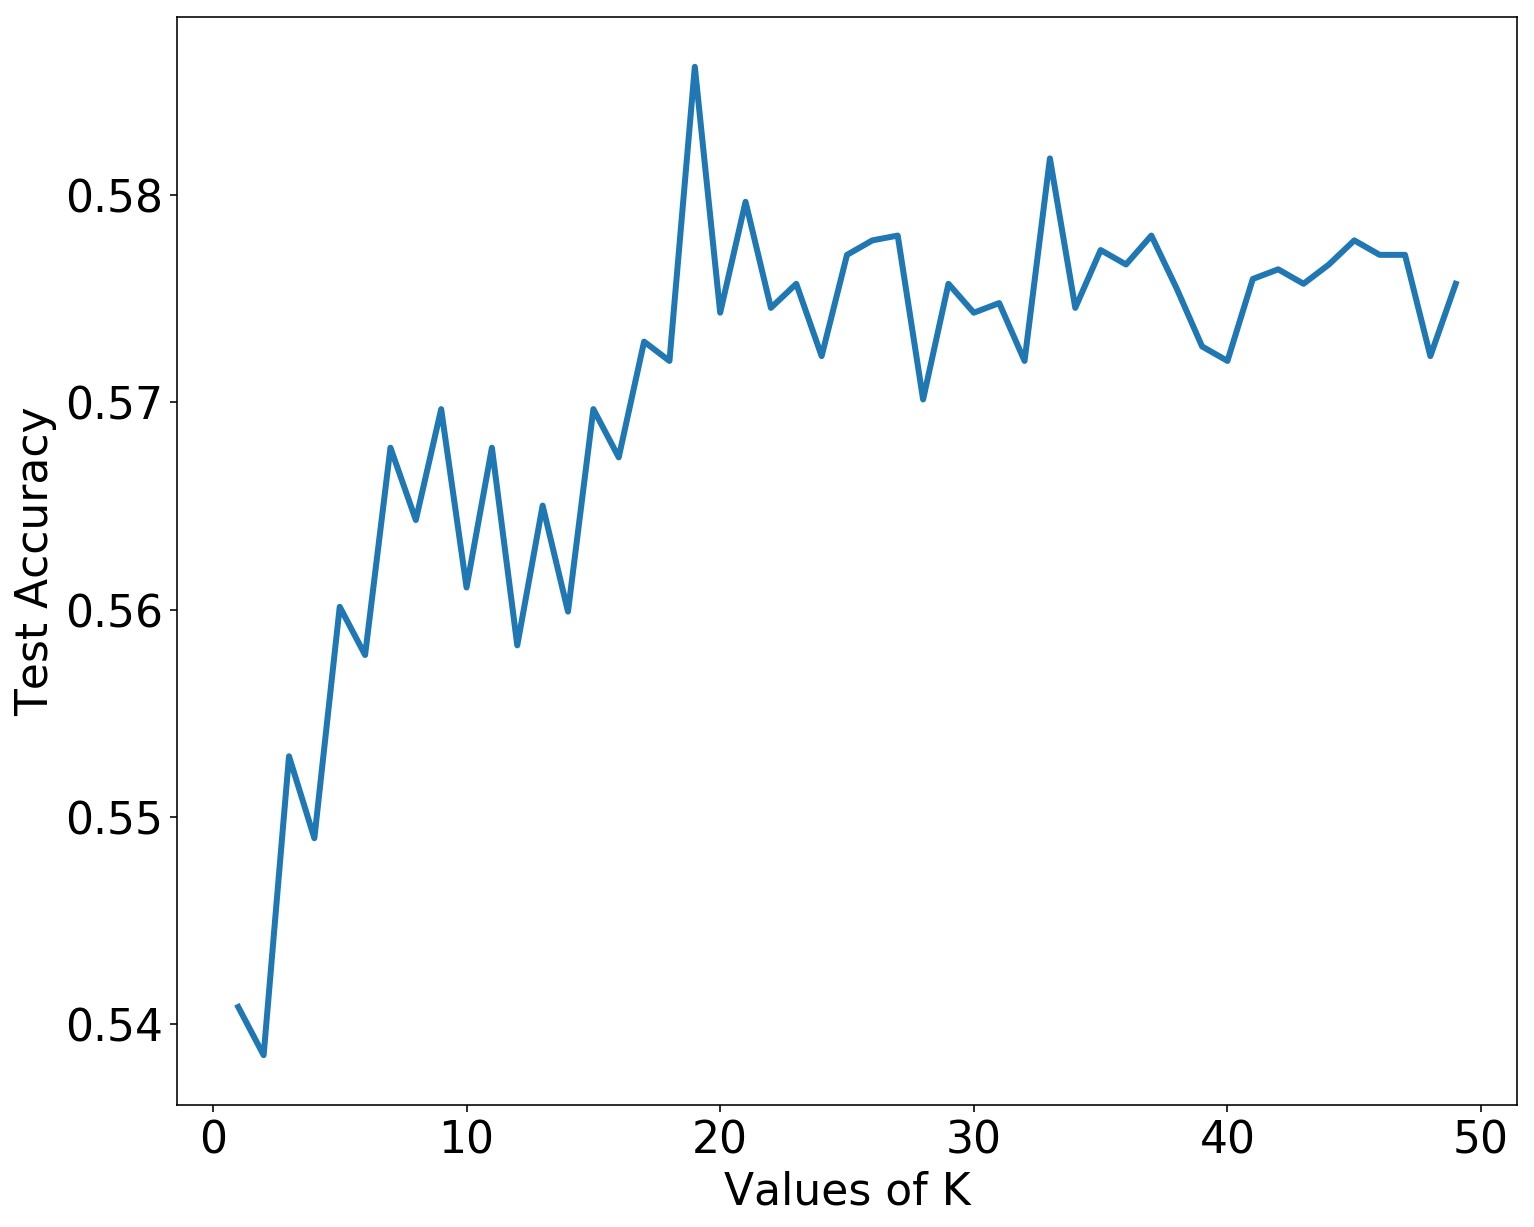

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
plt.rcParams.update({'font.size': 22})

ax.plot(list(range(1, 50)), test_acc, lw=3.)
#ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.ylabel('Test Accuracy')
plt.xlabel('Values of K')
plt.show()

from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

# plot test accuracy by number of neighbors:
test_acc = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv=5)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
plt.show()

In [ ]:
scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

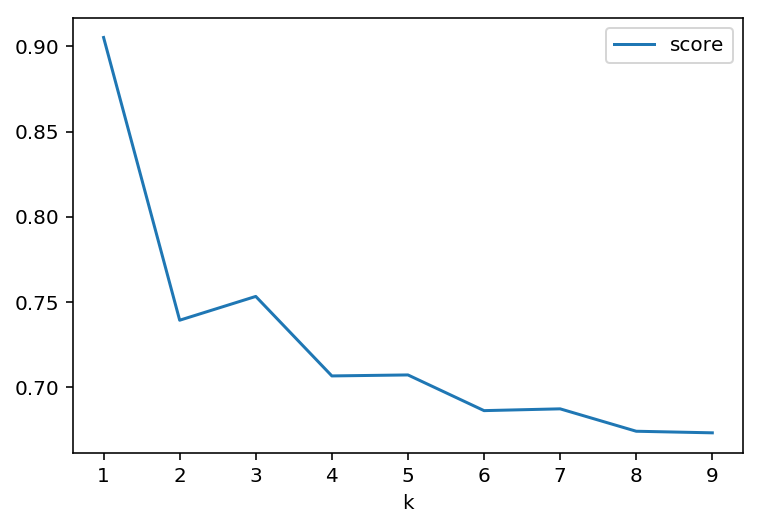

In [25]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');